In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [110]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()



In [119]:

import csv
data = pd.read_csv('datasets/smoke_detection_iot.csv', encoding='utf-8' )
data=one_hot_cols(data,['Fire Alarm'])
dataset= fit_cols(data,data.columns,Min_Max)
dataset.head(15)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm_0,Fire Alarm_1
0,0.000000,0.050600,0.512692,0.723239,0.0,0.00000,0.522488,0.525685,0.986014,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,1.0,0.0
1,0.000016,0.050603,0.512875,0.712535,0.0,0.00000,0.534928,0.547185,0.987013,0.000000,0.000000,0.0,0.000000,0.000000,0.00004,1.0,0.0
2,0.000032,0.050605,0.513046,0.701520,0.0,0.00000,0.544179,0.565731,0.986347,0.000000,0.000000,0.0,0.000000,0.000000,0.00008,1.0,0.0
3,0.000048,0.050607,0.513229,0.690971,0.0,0.00000,0.549282,0.579682,0.986125,0.000000,0.000000,0.0,0.000000,0.000000,0.00012,1.0,0.0
4,0.000064,0.050610,0.513412,0.681818,0.0,0.00000,0.553429,0.591498,0.987013,0.000000,0.000000,0.0,0.000000,0.000000,0.00016,1.0,0.0
5,0.000080,0.050612,0.513583,0.672975,0.0,0.00000,0.558533,0.604136,0.984904,0.000000,0.000000,0.0,0.000000,0.000000,0.00020,1.0,0.0
6,0.000096,0.050615,0.513766,0.665064,0.0,0.00000,0.562679,0.613983,0.986347,0.000000,0.000000,0.0,0.000000,0.000000,0.00024,1.0,0.0
7,0.000112,0.050617,0.513949,0.658703,0.0,0.00000,0.564912,0.623174,0.988567,0.000000,0.000000,0.0,0.000000,0.000000,0.00028,1.0,0.0
8,0.000128,0.050619,0.514120,0.652653,0.0,0.00000,0.567783,0.629903,0.988567,0.000000,0.000000,0.0,0.000000,0.000000,0.00032,1.0,0.0
9,0.000144,0.050622,0.514303,0.647223,0.0,0.00000,0.569378,0.636468,0.988345,0.000063,0.000083,0.0,0.000084,0.000093,0.00036,1.0,0.0


In [120]:
X_train, X_test, Y_train, Y_test = split_Dataset(data,['Fire Alarm_0','Fire Alarm_1'])
X_train = Variable(torch.Tensor(X_train).float())
X_test= Variable(torch.Tensor(X_test).float())
Y_train= Variable(torch.Tensor(Y_train).float())
Y_test= Variable(torch.Tensor(Y_test).float())


In [121]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(15,30)
        self.fc2 = nn.Linear(30,15)
        self.output = nn.Linear(15,2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x


In [122]:
net = Net()
net

Net(
  (fc1): Linear(in_features=15, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=15, bias=True)
  (output): Linear(in_features=15, out_features=2, bias=True)
)

In [123]:


criterion =nn.CrossEntropyLoss() #entropia cruzada
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

epochs = 300
loss_arr = []
for i in range(epochs):
    y_hat = net.forward(X_train)
    loss = criterion(y_hat, Y_train)
    loss_arr.append(loss)
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    



Epoch: 0 Loss: 0.7903852462768555
Epoch: 10 Loss: 0.5361068248748779
Epoch: 20 Loss: 0.40906864404678345
Epoch: 30 Loss: 0.266735315322876
Epoch: 40 Loss: 0.15873897075653076
Epoch: 50 Loss: 0.08073977380990982
Epoch: 60 Loss: 0.05169859901070595
Epoch: 70 Loss: 0.036604564636945724
Epoch: 80 Loss: 0.028851717710494995
Epoch: 90 Loss: 0.023583725094795227
Epoch: 100 Loss: 0.019657624885439873
Epoch: 110 Loss: 0.016509519889950752
Epoch: 120 Loss: 0.014100901782512665
Epoch: 130 Loss: 0.012180730700492859
Epoch: 140 Loss: 0.010626144707202911
Epoch: 150 Loss: 0.00935293361544609
Epoch: 160 Loss: 0.0083121657371521
Epoch: 170 Loss: 0.007461146917194128
Epoch: 180 Loss: 0.006765466183423996
Epoch: 190 Loss: 0.0061887879855930805
Epoch: 200 Loss: 0.005706517491489649
Epoch: 210 Loss: 0.005299096927046776
Epoch: 220 Loss: 0.004952236078679562
Epoch: 230 Loss: 0.004656564444303513
Epoch: 240 Loss: 0.004401444923132658
Epoch: 250 Loss: 0.004181556403636932
Epoch: 260 Loss: 0.00399159733206033

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

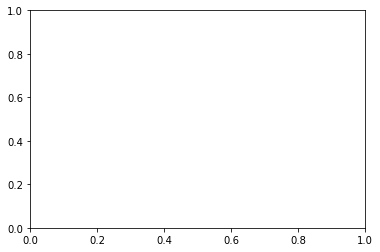

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(loss_arr, label='Loss')
plt.show()

In [118]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = net.forward(val)
        preds.append(y_hat.argmax().item())

        
df = pd.DataFrame({'Y': Y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

df

,Y,YHat,Correct
0,"(tensor(0.), tensor(1.))",1,0
1,"(tensor(1.), tensor(0.))",0,0
2,"(tensor(0.), tensor(1.))",1,0
3,"(tensor(0.), tensor(1.))",1,0
4,"(tensor(0.), tensor(1.))",1,0
...,...,...,...
12521,"(tensor(0.), tensor(1.))",1,0
12522,"(tensor(0.), tensor(1.))",1,0
12523,"(tensor(0.), tensor(1.))",1,0
12524,"(tensor(0.), tensor(1.))",1,0
